In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for SDOF Duffing oscillator with x.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for SDOF Duffing oscillator.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

# Drift equation discovery

In [2]:
"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    
 
    ind = len(D[0])
    
    return D, ind

In [3]:

import numpy as np

"""
A Duffing Van der pol system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 2
    k = 1000
    k3 = 100000
    sigma = 1
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    xz = []
    xzs = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        for n in range(len(t)-1):

            delgen = np.dot(delmat, np.random.normal(0,1,2))
            dW = delgen[0]
            dZ = delgen[1]
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m) * x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        zint = x[1,0:-1]
        xfinal = x[1,1:] 
        xmz = (xfinal - zint) # 'x(t)-z' vector
        xmz2 = np.multiply(xmz, xmz)
        xz.append(xmz)
        xzs.append(xmz2)
        
    xz = pow(dt,-1)*np.mean(np.array(xz), axis = 0)
    xzs = pow(dt,-1)*np.mean(np.array(xzs), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    time = t[0:-1]
    
    return xz, xzs, y1, y2, time

In [4]:
T = 1

# Response generation:
x1, x2 = 0.125, 0 # initial displacement for duffing
xdt, xdts, y1, y2, t_eval = duffing(x1, x2, T)

In [8]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary = np.mean(libr, axis = 0)

In [10]:
D = Dictionary
xdts = xdt
Dict = D.reshape(-1,order='F')

In [14]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[7.0],[8.0],[11.0],[19.0]]), 'Value': matlab.double([[-1000.5658788936705],[-2.001740160040777],[-99967.59815910431],[-0.06770312232218226],[9.587636145646005],[0.07215612483418313]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1

In [20]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [21]:
D_std = np.std(D[:,1:],axis = 0)
D_std = D_std.reshape(1,-1)
a = np.diag(1/D_std)
D1 = D*np.diag(1/D_std)

In [26]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True

DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -2083.5165740236803
Iteration = 1  log(Likelihood) = -1999.3176492316463
Iteration = 2  log(Likelihood) = -1999.3119826448153
Iteration = 3  log(Likelihood) = -1999.3119817201868
{'zmean': array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'wmean': array([-6.15782562e-15, -9.28257811e+01, -8.86713225e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.31937590e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 'wCOV': array([[ 2.65566740e-03,  1.85526191e-18,  1.03925617e-19,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.98272658e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,

C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


<StemContainer object of 3 artists>

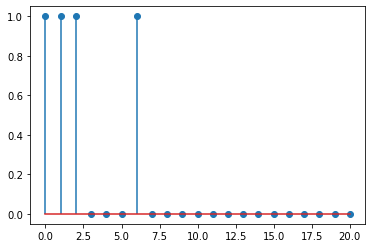

In [27]:
plt.stem(DS['zmean'])   

In [28]:
(DS["wmean"][1:]) / (D_std)

array([[-1.00088082e+03, -2.00287279e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00008320e+05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [29]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

-1000.8808201077443
-2.0028727921094567
-100008.320155249


# Diffusion equation discovery

In [1]:
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
A Duffing Van der pol system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 2
    k = 1000
    k3 = 100000
    sigma = 10
    
    # solution by Taylor 1.5 strong scheme Run with dt=0.01
    # -------------------------------------------------------
    # T = 1
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    xz = []
    xzs = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        for n in range(len(t)-1):

            delgen = np.dot(delmat, np.random.normal(0,1,2))
            dW = delgen[0]
            dZ = delgen[1]
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m) * x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        zint = x[1,0:-1]
        xfinal = x[1,1:] 
        xmz = (xfinal - zint) # 'x(t)-z' vector
        xmz2 = np.multiply(xmz, xmz)
        xz.append(xmz)
        xzs.append(xmz2)
        
    xz = pow(dt,-1)*np.mean(np.array(xz), axis = 0)
    xzs = pow(dt,-1)*np.mean(np.array(xzs), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    time = t[0:-1]
    
    return xz, xzs, y1, y2, time

1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
69
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
91
92
93
94
95
96
97
98
99
Iteration = 0  log(Likelihood) = 3937.2357779388108
Iteration = 1  log(Likelihood) = 5304.571146965922
Iteration = 2  log(Likelihood) = 5457.868329688951
Iteration = 3  log(Likelihood) = 5458.643681327865
Iteration = 4  log(Likelihood) = 5458.644102945878
Iteration = 5  log(Likelihood) = 5458.644103125316
{'zmean': array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'wmean': array([1.03286603e-17, 0.00000000e+00, 0.00000000e+00, 6.89656895e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.0000

C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:314: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:286: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:286: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:287: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:287: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


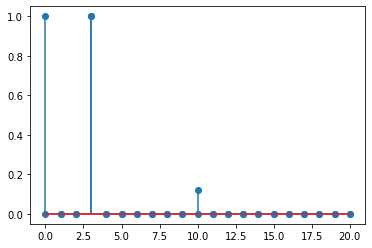

In [21]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

T = 1
np.random.seed(4)
# Response generation:
x1, x2 = 0.005, 0 # initial displacement condition
gg, xbt, y1, y2, t_eval = duffing(x1, x2, T)

# Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D = np.mean(libr, axis = 0)
# Bayesian Interference:
# D, xdts, muD, sdvD = fun_library0.BayInt(D, xbt)
xdts = xbt

# Residual variance:
err_var = fun_library0.res_var(D, xdts)

"""
# Gibbs sampling:
"""
# Hyper-parameters
ap, bp = 0.1, 1 # for beta prior for p0
av, bv = 0.5, 0.5 # inverge gamma for vs
asig, bsig = 1e-4, 1e-4 # invese gamma for sig^2

# Parameter Initialisation:
MCMC = 100  # No. of samples in Markov Chain,
p0 = np.zeros(MCMC)
vs = np.zeros(MCMC)
sig = np.zeros(MCMC)
p0[0] = 0.1
vs[0] = 10
sig[0] = err_var

N = len(xdts)

# Initial latent vector
zval = np.zeros(nl)
zint  = fun_library0.latent(nl, D, xdts)
zstore = np.transpose(np.vstack([zint]))
zval = zint

zval0 = zval
vs0 = vs[0]
mu, BSIG, Aor, index = fun_gibbs.sigmu(zval0, D, vs0, xdts)
Sz = sum(zval)

# Sample theta from Normal distribution
thetar = mvrv(mu, np.dot(sig[0], BSIG))
thetat = np.zeros(nl)
thetat[index] = thetar
theta = np.vstack(thetat)

for i in range(1, MCMC):
    
    # sample z from the Bernoulli distribution:
    zr = np.zeros(nl) # instantaneous latent vector (z_i):
    zr = zval
    for j in range(nl):
        ztemp0 = zr
        ztemp0[j] = 0
        if np.mean(ztemp0) == 0:
            PZ0 = fun_gibbs.pyzv0(xdts, N, asig, bsig)
        else:
            vst0 = vs[i-1]
            PZ0 = fun_gibbs.pyzv(D, ztemp0, vst0, N, xdts, asig, bsig)
        
        ztemp1 = zr
        ztemp1[j] = 1      
        vst1 = vs[i-1]
        PZ1 = fun_gibbs.pyzv(D, ztemp1, vst1, N, xdts, asig, bsig)
        
        zeta = PZ0 - PZ1  
        zeta = p0[i-1]/( p0[i-1] + np.exp(zeta)*(1-p0[i-1]))
        zr[j] = bern(1, p = zeta, size = None)
    
    zval = zr
    zstore = np.append(zstore, np.vstack(zval), axis = 1)
    
    # sample sig^2 from inverse Gamma:
    asiggamma = asig+0.5*N
    temp = np.matmul(np.matmul(mu.T, LA.inv(BSIG)), mu)
    bsiggamma = bsig+0.5*(np.dot(xdts.T, xdts) - temp)
    sig[i] = 1/IG(asiggamma, 1/bsiggamma) # inverse gamma RVs
    
    # sample vs from inverse Gamma:
    avvs = av+0.5*Sz
    bvvs = bv+(np.matmul(np.matmul(thetar.T, LA.inv(Aor)), thetar))/(2*sig[i])
    vs[i] = 1/IG(avvs, 1/bvvs) # inverse gamma RVs
    
    # sample p0 from Beta distribution:
    app0 = ap+Sz
    bpp0 = bp+nl-Sz # Here, P=nl (no. of functions in library)
    p0[i] = beta(app0, bpp0)
    # or, np.random.beta()
    
    # Sample theta from Normal distribution:
    vstheta = vs[i]
    mu, BSIG, Aor, index = fun_gibbs.sigmu(zval, D, vstheta, xdts)
    Sz = sum(zval)
    thetar = mvrv(mu, np.dot(sig[i], BSIG))
    thetat = np.zeros(nl)
    thetat[index] = thetar
    theta = np.append(theta, np.vstack(thetat), axis = 1)

zstorediff = zstore[:, 51:]    
Zmeandiff = np.mean(zstorediff, axis=1)

thetadiff = theta[:,51:]
mutdiff = np.mean(thetadiff, axis=1)
sigtdiff = np.cov(thetadiff, bias = False)

# Post processing:
mutind = np.where(mutdiff<(np.max(np.abs(mutdiff))*0.02))
Zmeandiff[mutind] = Zmeandiff[mutind]*1e-3
# thetanor = thetadiff[3,:] - np.abs(thetadrift[1,:])
# munormal = np.mean(thetanor)

plt.stem(Zmeandiff)

import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

D_std = np.std(D[:,1:],axis = 0)
D_std = D_std.reshape(1,-1)
a = np.diag(1/D_std)
D1 = D[:,1:]*np.diag(1/D_std)

X = D1
y = xdts
initz0 = Zmeandiff[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)

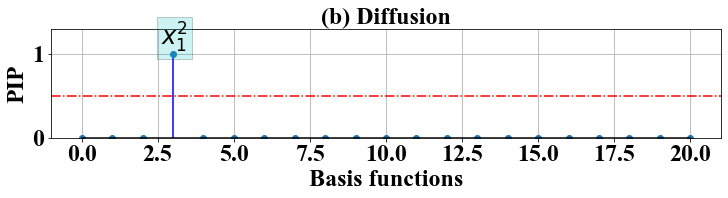

In [38]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('Basis functions',fontweight='bold')
# plt.ylim([0,2])
plt.ylabel('PIP', fontweight='bold');
plt.title('(b) Diffusion', fontweight='bold',fontsize=24)
plt.grid(True); plt.ylim(0,1.3)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
# plt.text(1.4, 1.1, "$x_1$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24, ha='right')
# plt.text(1.8, 1.1, "$x_2$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24)
plt.text(2.6, 1.1, "$x_1^2$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24)
figure1.savefig('duffing_diff_x.pdf',format='pdf',dpi=600,bbox_inches='tight')

In [25]:
np.sqrt(abs(wmean[0][2]-1000.85))

10.001752595271762

# True value prediction

In [1]:
import numpy as np
import pickle 

Nsamp = 10000
dt = 0.0005
T = 30
t = np.arange(0, T+dt, dt)
dW = np.sqrt(dt)*np.random.randn(10000, 60001)

pickle.dump(dW, open('Forcing_Term_DUFFING.p', 'wb'))

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_DUFFING.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [3]:

import numpy as np

"""
A Duffing system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 1
    k = 1000
    k3 = 100000
    sigma = 10
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 1000 # no. of samples in the run
    
    y1 = []
    y2 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        if (ensemble%1)==0:
        for n in range(len(t)-1):
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m)*x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW[ensemble][n] 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        
        
    y1 = np.array(y1)
    y2 = np.array(y2)
    return y1, y2

In [ ]:
T = 30

# Response generation:
x1, x2 = 0.05, 0.05 # initial displacement for duffing
y1, y2 = duffing(x1, x2, T)

(1000, 60001)


Text(0.5, 1.0, 'Velocity')

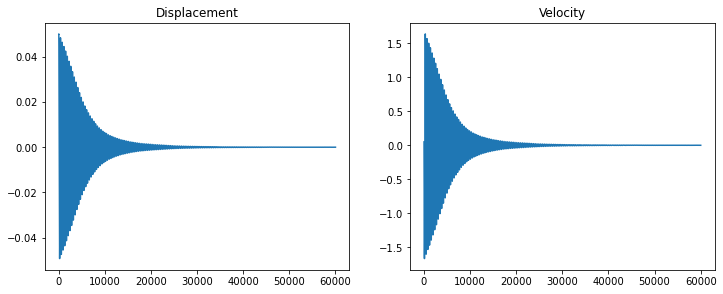

In [5]:
for i in y1:
    if max(i)<1000:
        pass
a = []

for i in y1:
    
    if np.mean(i)<1000:
        a.append(i)
a = np.array(a)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(a, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

In [8]:
output = [y1, y2]

In [9]:
import pickle 

pickle.dump(output, open('Duffing_actual_relia_with_x_100ensem_c2.p', 'wb'))

# Estimated value prediction

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_DUFFING.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [3]:

import numpy as np

"""
A Duffing system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 0.9934
    k = 999.485
    k3 = 99989.5
    sigma = 10.01
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 1000 # no. of samples in the run
    
    y1 = []
    y2 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        if (ensemble%10)==0:
        for n in range(len(t)-1):
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m)*x0[0] 

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW[ensemble][n] 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        
        
    y1 = np.array(y1)
    y2 = np.array(y2)
    return y1, y2

In [ ]:
T = 30

# Response generation:
x1, x2 = 0.05, 0.05 # initial displacement for duffing
y1, y2 = duffing(x1, x2, T)

In [ ]:
for i in y1:
    if max(i)<1000:
        pass
a = []

for i in y1:
    
    if np.mean(i)<1000:
        a.append(i)
a = np.array(a)

In [8]:
output = [y1, y2]

In [9]:
import pickle 

pickle.dump(output, open('Duffing_Final_relia_with_x_100ensem_c2.p', 'wb'))

In [10]:
output[0].shape

(1000, 60001)

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
actual_1 = "Duffing_actual_relia_with_x_100ensem_c2.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)

In [ ]:
actual_2 = "Duffing_Final_relia_with_x_100ensem_c2.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)

In [ ]:
y11 = actual_1[0]
y12 = actual_2[0]
y1_1 = actual_1[0]

In [8]:
a=np.linspace(0,30,60001)

In [14]:
a=np.linspace(0,30,60001)

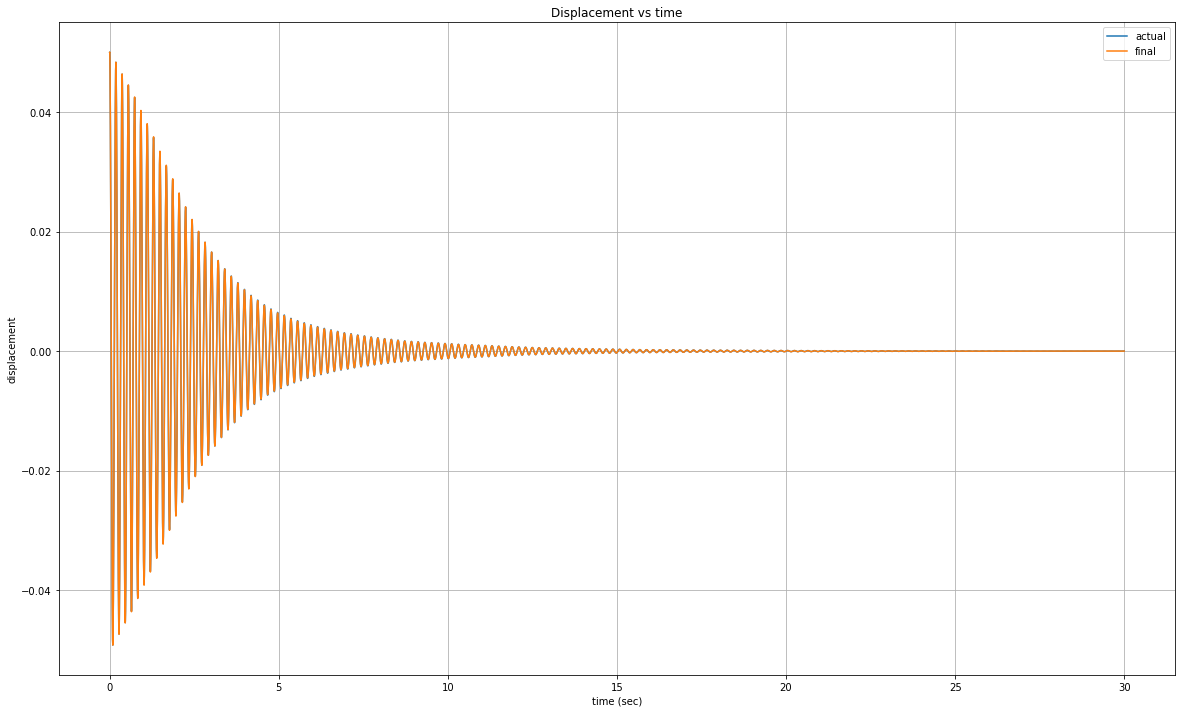

In [15]:
plt.figure(figsize=(20,12))
plt.xlim()
plt.plot(a,np.mean(y1_1[:1000], axis=0),label='actual')
plt.plot(a,np.mean(y12[:1000], axis=0),label='final')
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.legend()
plt.grid()
plt.savefig('states_tm.pdf')
plt.show()

In [ ]:
threshold = 0.052
# print(i)
ensem = 1000
idx = [np.where(y1_1[i,:]>threshold) for i in range(ensem)]
count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)
pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y1_1[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t.add(i)
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/ensem)
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])

final_1 = "Duffing_Final_relia_with_x.p"
file_final_1 = open(final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
final_1 = np.array(file_obj_final_1)
yf = final_1[0]
yf.shape
idx_f = [np.where(yf[i,:]>threshold) for i in range(ensem)]
count_f = 0
for i in idx_f:
    if len(i[0])!=0:
        count_f += 1
print("Probabilty of Failure :", count_f/len(idx_f))
ans_f = []
for i in idx_f:
    if len(i[0])!=0:
        ans_f.append((i[0][0])/2000)
    else:
        ans_f.append(60000/2000)

pf_count_per_t_f = set()
prob_fail_f = []
for i in range(60001):
    colmn = yf[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t_f.add(i)
    no_of_fail_f = len(pf_count_per_t_f)
    prob_fail_f.append(no_of_fail_f/ensem)
final_ans_f = []
for i in range(len(prob_fail_f)):
    if i%2000 == 0:
        final_ans_f.append(prob_fail_f[i])

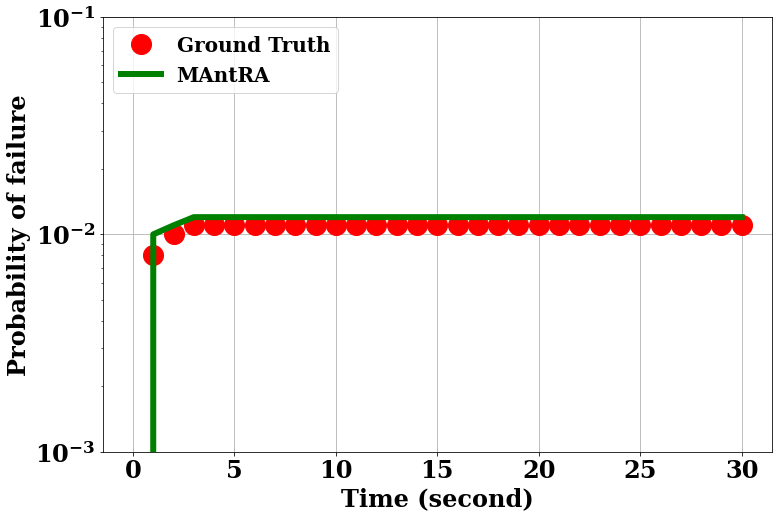

In [22]:

plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_f,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.ylim([1e-3,0.1])
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability duffing_x.pdf')
plt.show()